# Imports

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower
import statsmodels.stats.multicomp as mc

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

from sklearn.preprocessing import StandardScaler

import os
import json

In [8]:
with open('data/paths.json','r') as f:
    paths = json.load(f)

data_path = paths["data_path"]

In [9]:
sns.set(style = 'whitegrid')

# Load data

In [10]:
data = pd.read_csv(os.path.join(data_path,'clean_data_metabolites.csv'))
data.head()

,Sample Number,Sample Submission Date,Sample Name,Sex,Tissue weight\n(mg),Treatment,Tissue Type,PND,Litter,Metabolite,MRM Transition of each lipid species\n(Parent ion/Fragment ion),Metabolite used as Internal Standard,Retention Time\n(min),Peak Area of Metabolite,Peak Area of Internal Standard,Normalized Peak Area\n(Peak Area of Metabolite / (Peak Area of Internal Standard * Tisue weight))
0,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Urea.1,61.0 / 44.0,L-Tryptophan.1.IS,1.959026,5.326877e+07,1.792767e+07,0.053059
1,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Ethanolamine.1,62.1 / 44.1,L-Tryptophan.1.IS,9.962347,1.287801e+07,1.792767e+07,0.012827
2,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Imidazole.1,69.0 / 42.2,L-Tryptophan.1.IS,2.478150,1.576080e+05,1.792767e+07,0.000157
3,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Trimethylamine-N-oxide.1,76.0 / 58.1,L-Tryptophan.1.IS,4.874291,1.159692e+07,1.792767e+07,0.011551
4,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Glycine.2,76.0 / 30.0,L-Tryptophan.1.IS,6.283526,4.631088e+06,1.792767e+07,0.004613


In [11]:
len(data['Metabolite'].unique())

178

In [12]:
data['Sex'].value_counts()
data['Sample Submission Date'].value_counts()

09/2021    8275
11/2022    4091
Name: Sample Submission Date, dtype: int64

In [ ]:
data['']

In [14]:
std_scaler = StandardScaler()
data['log_area'] = np.log10(data['Normalized Peak Area\n(Peak Area of Metabolite / (Peak Area of Internal Standard * Tisue weight))'])
data['log_scaled_area'] = std_scaler.fit_transform(data[['log_area']])
data.head(20)

,Sample Number,Sample Submission Date,Sample Name,Sex,Tissue weight\n(mg),Treatment,Tissue Type,PND,Litter,Metabolite,MRM Transition of each lipid species\n(Parent ion/Fragment ion),Metabolite used as Internal Standard,Retention Time\n(min),Peak Area of Metabolite,Peak Area of Internal Standard,Normalized Peak Area\n(Peak Area of Metabolite / (Peak Area of Internal Standard * Tisue weight)),log_area,log_scaled_area
0,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Urea.1,61.0 / 44.0,L-Tryptophan.1.IS,1.959026,5.326877e+07,1.792767e+07,0.053059,-1.275239,1.170930
1,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Ethanolamine.1,62.1 / 44.1,L-Tryptophan.1.IS,9.962347,1.287801e+07,1.792767e+07,0.012827,-1.891863,0.651374
2,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Imidazole.1,69.0 / 42.2,L-Tryptophan.1.IS,2.478150,1.576080e+05,1.792767e+07,0.000157,-3.804134,-0.959870
3,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Trimethylamine-N-oxide.1,76.0 / 58.1,L-Tryptophan.1.IS,4.874291,1.159692e+07,1.792767e+07,0.011551,-1.937369,0.613031
4,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Glycine.2,76.0 / 30.0,L-Tryptophan.1.IS,6.283526,4.631088e+06,1.792767e+07,0.004613,-2.336029,0.277128
5,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Sarcosine.1,90.0 / 44.0,L-Tryptophan.1.IS,4.496771,6.496060e+04,1.792767e+07,0.000065,-4.189062,-1.284203
6,1,09/2021,C20M1S,M,56,control,striatum,30,C20,L-Alanine.1,90.1 / 44.1,L-Tryptophan.1.IS,5.105011,2.110331e+07,1.792767e+07,0.021020,-1.677361,0.832109
7,1,09/2021,C20M1S,M,56,control,striatum,30,C20,B-Alanine.1,90.1 / 30.1,L-Tryptophan.1.IS,6.472060,1.848149e+06,1.792767e+07,0.001841,-2.734975,-0.059016
8,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Aminobutyric acid(Abu).1,104.1 / 58.0,L-Tryptophan.1.IS,4.054535,3.033726e+06,1.792767e+07,0.003022,-2.519735,0.122340
9,1,09/2021,C20M1S,M,56,control,striatum,30,C20,Aminoisobutyric acid (BAIBA).1,104.1 / 86.0,L-Tryptophan.1.IS,4.675121,6.632156e+05,1.792767e+07,0.000661,-3.180057,-0.434034


# Manipulate data

Extract log value of the target variable

In [ ]:
""" columns_to_log_transform = ['Normalized Peak Area (Peak Area of Lipid Species / (Peak Area of Internal Standard * Tissue Weight))']

for c in columns_to_log_transform:
    data['log'+c[0].capitalize()+c[1:]] = data[c].apply(lambda x: np.log10(x))

data.rename(columns= {'Tissue Type':'TissueType','logNormalized Peak Area (Peak Area of Lipid Species / (Peak Area of Internal Standard * Tissue Weight))':'logNormalizedArea'}, inplace=True) """

Add a column to identify the date

In [15]:
def classify_date(input_date):
    if input_date == '09/2021':
        return 1
    else:
        return 2

data['dateId'] = data['Sample Submission Date'].apply(lambda x: classify_date(x))

<h4> Let's isolate only PND 30 and TissueType cortex</h4>

In [23]:
data_subset_30_cor = data[(data['PND'] == 30) & (data['Tissue Type'] == 'cortex')]
data_subset_30_cor.head()

,Sample Number,Sample Submission Date,Sample Name,Sex,Tissue weight\n(mg),Treatment,Tissue Type,PND,Litter,Metabolite,MRM Transition of each lipid species\n(Parent ion/Fragment ion),Metabolite used as Internal Standard,Retention Time\n(min),Peak Area of Metabolite,Peak Area of Internal Standard,Normalized Peak Area\n(Peak Area of Metabolite / (Peak Area of Internal Standard * Tisue weight)),log_area,log_scaled_area,dateId
2065,13,09/2021,C20M1C,M,64,control,cortex,30,C20,Urea.1,61.0 / 44.0,L-Tryptophan.1.IS,1.963218,7.047241e+07,1.603581e+07,0.068667,-1.163252,1.265288,1
2066,13,09/2021,C20M1C,M,64,control,cortex,30,C20,Ethanolamine.1,62.1 / 44.1,L-Tryptophan.1.IS,9.974376,1.108042e+07,1.603581e+07,0.010797,-1.966714,0.588305,1
2067,13,09/2021,C20M1C,M,64,control,cortex,30,C20,Imidazole.1,69.0 / 42.2,L-Tryptophan.1.IS,2.482309,2.644361e+05,1.603581e+07,0.000258,-3.588950,-0.778560,1
2068,13,09/2021,C20M1C,M,64,control,cortex,30,C20,Trimethylamine-N-oxide.1,76.0 / 58.1,L-Tryptophan.1.IS,4.865354,1.368595e+07,1.603581e+07,0.013335,-1.874996,0.665586,1
2069,13,09/2021,C20M1C,M,64,control,cortex,30,C20,Glycine.2,76.0 / 30.0,L-Tryptophan.1.IS,6.258482,4.061795e+06,1.603581e+07,0.003958,-2.402553,0.221076,1


In [36]:
data_subset_30_corr_wide = data_subset_30_cor.pivot(index=['Sample Name','Treatment'], columns='Metabolite', values='log_scaled_area').reset_index()
data_subset_30_corr_wide

Metabolite,Sample Name,Treatment,1 or 3-Methyl-Histidine.1,2'-O-Methyl Adenosine.1,2'-O-Methyl Guanosine.1,2'-O-Methyl Uridine.1,2-Aminoadipic acid/Indole-3-carboxylic acid,2-Deoxycytide,2-Hydroxybutyrate.1,2-Hydroxyglutarate.1,...,Ureidosuccinic acid.1,Uridine.1,Xanthine.1,Xanthurenic Acid.1,Xylitol/Arabitol,Xylose.1,acetyl-CoA_pos,dGDP.1,glutathione disulfide_pos,sn-glycerol-3-phosphate.1
0,C11F1C,control,0.547548,-1.486265,-1.732605,-1.716099,0.138764,-0.268112,-0.708386,0.999917,...,0.893980,0.920238,0.497902,-1.177795,-0.693818,-0.597589,-0.363790,0.407018,NaN,-0.105384
1,C11M2C,control,0.332033,-1.343792,-1.721333,-1.416639,-0.429371,-0.108829,-1.032309,0.642438,...,0.520328,0.908515,0.590300,-1.474374,-0.927982,-0.626295,-1.035247,-0.709687,0.301608,-0.344569
2,C20F1C,control,0.334129,-1.311788,-1.636231,-1.582308,-0.508273,-0.104000,-1.017407,0.660336,...,0.575568,0.993272,0.602180,-1.534034,-0.885336,-0.630305,-1.290409,-0.752486,0.187526,-0.364254
3,C20M1C,control,0.470283,-1.296216,-1.677342,-1.435786,-0.374068,-0.065247,-1.082242,0.607660,...,0.484844,0.970231,0.661819,-1.456669,-0.919799,-0.600760,-0.783587,-0.582681,0.477254,-0.398778
4,C21F1C,control,0.468865,-1.566792,-1.596160,-1.414212,-0.306808,-0.119503,-0.904914,0.731706,...,0.625892,1.002494,0.647636,-1.321336,-0.767049,-0.581432,-0.687438,-0.773231,0.245069,-0.245477
5,C21M1C,control,0.614712,-1.332356,-1.418696,-1.517502,-0.027479,-0.183071,-0.672589,0.978402,...,0.872773,1.043778,0.682330,-1.093391,-0.556990,-0.469339,0.023332,-0.244160,0.620998,0.009662
6,T20F1C,deltamethrin,0.487498,-1.454484,-1.591782,-1.492572,-0.186942,-0.185034,-0.876733,0.773632,...,0.652489,0.958453,0.561145,-1.288788,-0.796579,-0.616107,-0.519724,-0.628200,0.460484,-0.207010
7,T23M1C,deltamethrin,0.254600,-1.136390,-1.842314,-1.447689,-0.805921,-0.170314,-1.255881,0.484814,...,0.301309,0.864253,0.522383,-1.720255,-1.080986,-0.659245,-1.341307,-1.138807,-0.252804,-0.337501
8,T24M2C,deltamethrin,0.216201,-1.203023,-1.727942,-1.591496,-0.809951,-0.173695,-1.207658,0.475265,...,0.335626,0.850748,0.408298,-1.778281,-1.117021,-0.702022,-1.438773,-1.196102,-0.070124,-0.353351
9,T33F2C,deltamethrin,0.502140,-1.453383,-1.617090,-1.563929,-0.419773,-0.130111,-0.909332,0.690012,...,0.581578,0.973740,0.595829,-1.359371,-0.908993,-0.670073,-0.733180,-0.669523,0.475490,-0.321152


In [37]:
y = data_subset_30_corr_wide['Treatment'].map({'control': True, 'deltamethrin': False})
y = np.array(y, dtype=int)
y

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

#### Let's removethe column with NaN elements

In [40]:
data_subset_30_corr_wide.dropna(axis=1, inplace=True)
data_subset_30_corr_wide

Metabolite,Sample Name,Treatment,1 or 3-Methyl-Histidine.1,2'-O-Methyl Adenosine.1,2'-O-Methyl Guanosine.1,2'-O-Methyl Uridine.1,2-Aminoadipic acid/Indole-3-carboxylic acid,2-Deoxycytide,2-Hydroxybutyrate.1,2-Hydroxyglutarate.1,...,Urate.1,Urea.1,Ureidosuccinic acid.1,Uridine.1,Xanthine.1,Xanthurenic Acid.1,Xylitol/Arabitol,Xylose.1,dGDP.1,sn-glycerol-3-phosphate.1
0,C11F1C,control,0.547548,-1.486265,-1.732605,-1.716099,0.138764,-0.268112,-0.708386,0.999917,...,-0.809226,1.217585,0.893980,0.920238,0.497902,-1.177795,-0.693818,-0.597589,0.407018,-0.105384
1,C11M2C,control,0.332033,-1.343792,-1.721333,-1.416639,-0.429371,-0.108829,-1.032309,0.642438,...,-0.338103,1.279779,0.520328,0.908515,0.590300,-1.474374,-0.927982,-0.626295,-0.709687,-0.344569
2,C20F1C,control,0.334129,-1.311788,-1.636231,-1.582308,-0.508273,-0.104000,-1.017407,0.660336,...,-0.468684,1.285726,0.575568,0.993272,0.602180,-1.534034,-0.885336,-0.630305,-0.752486,-0.364254
3,C20M1C,control,0.470283,-1.296216,-1.677342,-1.435786,-0.374068,-0.065247,-1.082242,0.607660,...,-0.416291,1.265288,0.484844,0.970231,0.661819,-1.456669,-0.919799,-0.600760,-0.582681,-0.398778
4,C21F1C,control,0.468865,-1.566792,-1.596160,-1.414212,-0.306808,-0.119503,-0.904914,0.731706,...,-0.333762,1.279987,0.625892,1.002494,0.647636,-1.321336,-0.767049,-0.581432,-0.773231,-0.245477
5,C21M1C,control,0.614712,-1.332356,-1.418696,-1.517502,-0.027479,-0.183071,-0.672589,0.978402,...,-0.277453,1.347357,0.872773,1.043778,0.682330,-1.093391,-0.556990,-0.469339,-0.244160,0.009662
6,T20F1C,deltamethrin,0.487498,-1.454484,-1.591782,-1.492572,-0.186942,-0.185034,-0.876733,0.773632,...,-0.195707,1.324558,0.652489,0.958453,0.561145,-1.288788,-0.796579,-0.616107,-0.628200,-0.207010
7,T23M1C,deltamethrin,0.254600,-1.136390,-1.842314,-1.447689,-0.805921,-0.170314,-1.255881,0.484814,...,-0.498410,1.253632,0.301309,0.864253,0.522383,-1.720255,-1.080986,-0.659245,-1.138807,-0.337501
8,T24M2C,deltamethrin,0.216201,-1.203023,-1.727942,-1.591496,-0.809951,-0.173695,-1.207658,0.475265,...,-0.462865,1.229923,0.335626,0.850748,0.408298,-1.778281,-1.117021,-0.702022,-1.196102,-0.353351
9,T33F2C,deltamethrin,0.502140,-1.453383,-1.617090,-1.563929,-0.419773,-0.130111,-0.909332,0.690012,...,-0.306184,1.224269,0.581578,0.973740,0.595829,-1.359371,-0.908993,-0.670073,-0.669523,-0.321152


In [ ]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

/home/ivan/.local/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 11
  warnings.warn(f"Y residual is constant at iteration {k}")


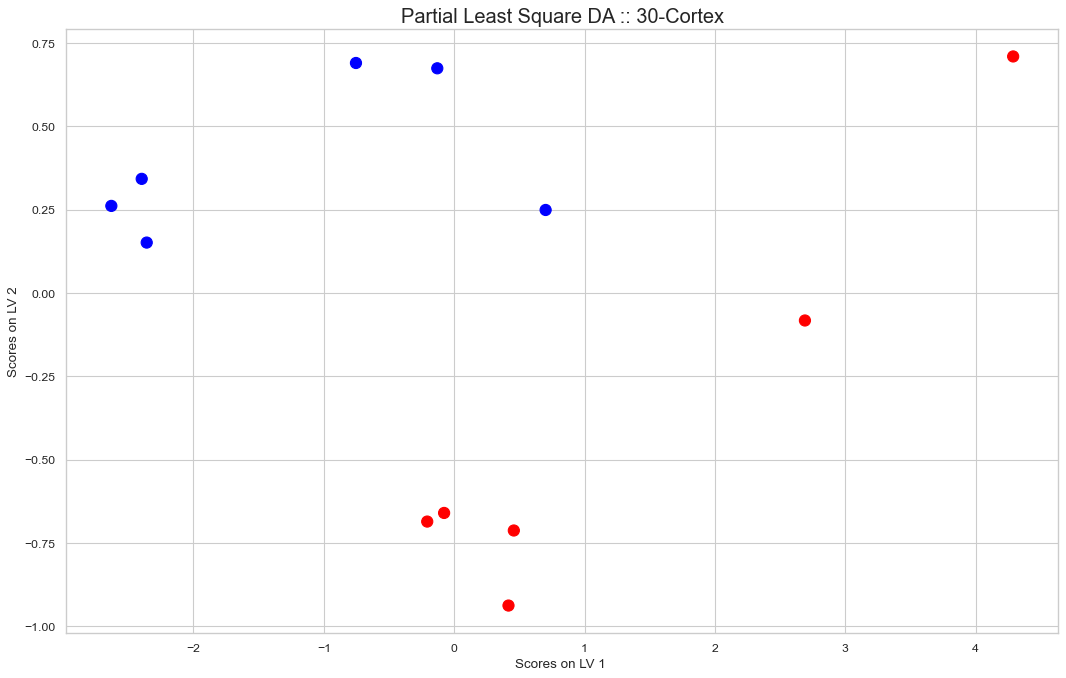

In [69]:
from sklearn.cross_decomposition import PLSRegression
plsr = PLSRegression(n_components=50, scale=False) # (1)

colormap = {
    'control': '#ff0000',  # Red
    'deltamethrin': '#0000ff',  # Blue
}

color= ['red' if x == 'control' else 'blue' for x in data_subset_30_corr_wide['Treatment']]


plsr.fit(data_subset_30_corr_wide.iloc[:,2:].values, y) # (2)

scores = pd.DataFrame(plsr.x_scores_)
scores.index=data_subset_30_corr_wide.iloc[:,0]



fig = plt.figure(figsize=(16,10), dpi=80, facecolor='w', edgecolor='k')
scores.plot(x=0, y=1, kind='scatter', s=100, color=color, ax=plt.gca())
plt.gca().set(xlabel='Scores on LV 1 ', ylabel='Scores on LV 2')
plt.title("Partial Least Square DA :: 30-Cortex", fontsize=18)



plt.show()




In [74]:
plsr.

array([[-0.06757652],
       [ 0.01370527],
       [-0.01077721],
       [-0.01377403],
       [-0.08140098],
       [ 0.04798542],
       [ 0.00534376],
       [ 0.02026706],
       [-0.0900677 ],
       [ 0.10987906],
       [ 0.06169078],
       [-0.02302364],
       [-0.18342963],
       [ 0.10485772],
       [ 0.11281739],
       [ 0.0307259 ],
       [ 0.04998804],
       [-0.04392409],
       [ 0.01061579],
       [ 0.01660248],
       [-0.00974515],
       [ 0.0683583 ],
       [ 0.00099481],
       [ 0.0151657 ],
       [ 0.01843221],
       [-0.14103145],
       [ 0.01433163],
       [-0.02304456],
       [ 0.05969916],
       [ 0.08665324],
       [-0.08301973],
       [ 0.04550324],
       [ 0.0862158 ],
       [ 0.0713986 ],
       [ 0.03542341],
       [-0.01608274],
       [-0.11066141],
       [ 0.07985555],
       [-0.00447474],
       [-0.03200714],
       [ 0.05514601],
       [ 0.02435374],
       [ 0.11354966],
       [ 0.01175177],
       [ 0.13206006],
       [ 0

# Figures

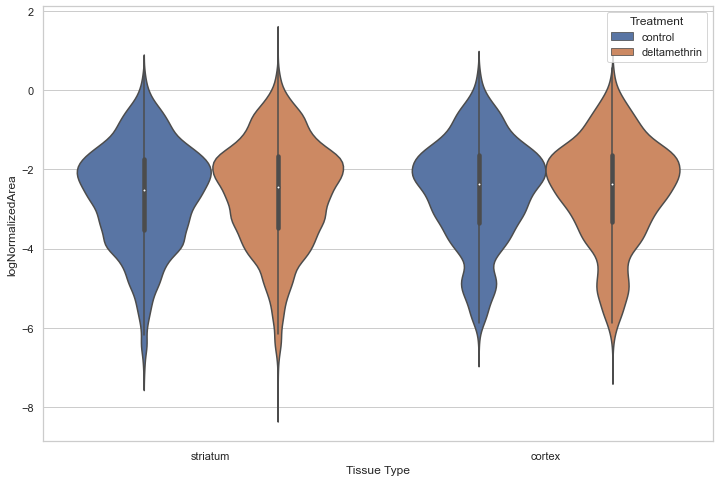

In [ ]:
fig100 = plt.figure(figsize=(12,8))
ax = sns.violinplot(data=data, x='TissueType', hue='Treatment', y='logNormalizedArea')
ax.set_xlabel('Tissue Type')

fig100.savefig(os.path.join(data_path,"violinplot-tissue.svg"), format='svg', facecolor='w')

plt.show()

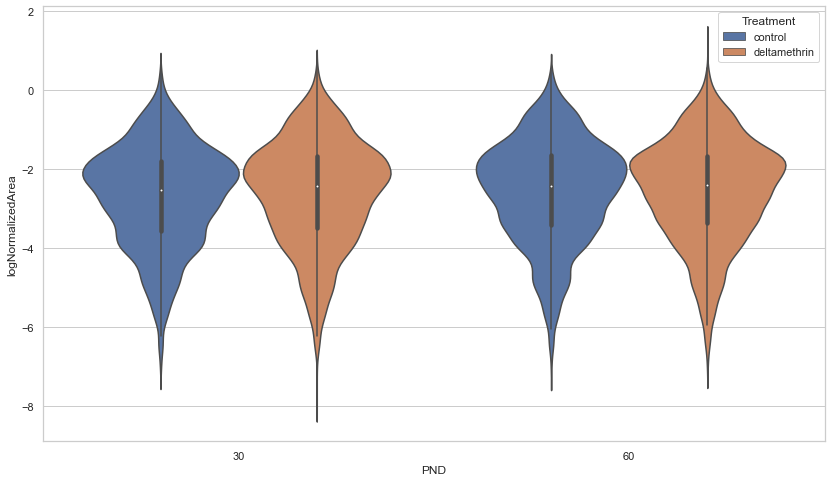

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = sns.violinplot(data=data, x='PND', hue='Treatment', y='logNormalizedArea')
ax.set_xlabel('PND')
                    
fig.savefig(os.path.join(data_path,"violinplot-pnd.svg"), format='svg', facecolor='w')

plt.show()

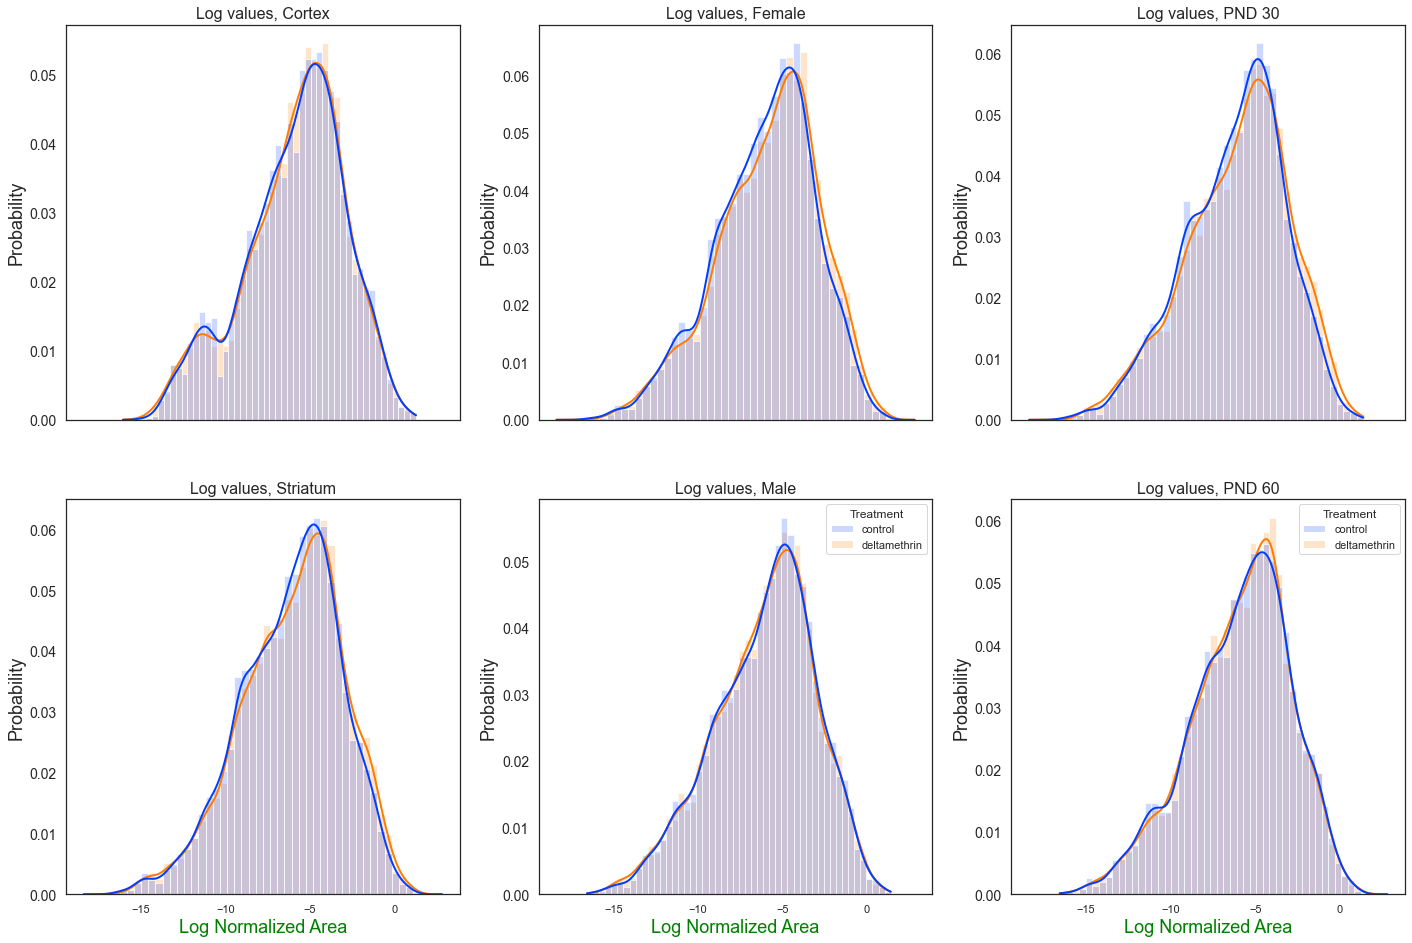

In [ ]:
sns.set_style('white')

fig, ax = plt.subplots(2, 3, sharex=True, figsize=(24,16), )

opt = {'bins': 50, 'alpha': 0.2, 'palette': 'bright',
        'stat': 'probability', 'kde': True,
        'line_kws': {'lw': 2}, 'common_norm': False}

sns.histplot(data=data[data['TissueType'] == 'cortex'], x='logNormalizedArea', hue='Treatment', ax=ax[0,0], legend=False, **opt)
ax[0,0].set_title('Log values, Cortex', fontsize=16)
ax[0,0].set_ylabel('Probability', fontsize=18)
ax[0,0].tick_params(axis='y', labelsize=14)
sns.histplot(data=data[data['TissueType'] == 'striatum'], x='logNormalizedArea', hue='Treatment', ax=ax[1,0], legend=False, **opt)
ax[1,0].set_title('Log values, Striatum', fontsize=16)
ax[1,0].set_xlabel('Log Normalized Area', fontsize=18, color='green')
ax[1,0].set_ylabel('Probability', fontsize=18)
ax[1,0].tick_params(axis='y', labelsize=14)

sns.histplot(data=data[data['Sex'] == 'F'], x='logNormalizedArea', hue='Treatment', ax=ax[0,1], legend=False, **opt)
ax[0,1].set_title('Log values, Female', fontsize=16)
ax[0,1].set_ylabel('Probability', fontsize=18)
ax[0,1].tick_params(axis='y', labelsize=14)
sns.histplot(data=data[data['Sex'] == 'M'], x='logNormalizedArea', hue='Treatment', ax=ax[1,1], legend=True, **opt)
ax[1,1].set_title('Log values, Male', fontsize=16)
ax[1,1].set_xlabel('Log Normalized Area', fontsize=18, color='green')
ax[1,1].set_ylabel('Probability', fontsize=18)
ax[1,1].tick_params(axis='y', labelsize=14)

sns.histplot(data=data[data['PND'] == 30], x='logNormalizedArea', hue='Treatment', ax=ax[0,2], legend=False, **opt)
ax[0,2].set_title('Log values, PND 30', fontsize=16)
ax[0,2].set_ylabel('Probability', fontsize=18)
ax[0,2].tick_params(axis='y', labelsize=14)
sns.histplot(data=data[data['PND'] == 60], x='logNormalizedArea', hue='Treatment', ax=ax[1,2], legend=True, **opt)
ax[1,2].set_title('Log values, PND 60', fontsize=16)
ax[1,2].set_xlabel('Log Normalized Area', fontsize=18, color='green')
ax[1,2].set_ylabel('Probability', fontsize=18)
ax[1,2].tick_params(axis='y', labelsize=14)

fig.savefig(os.path.join(data_path,"distribution-3cases.png"), format='png', facecolor='w', dpi=600)

plt.show()

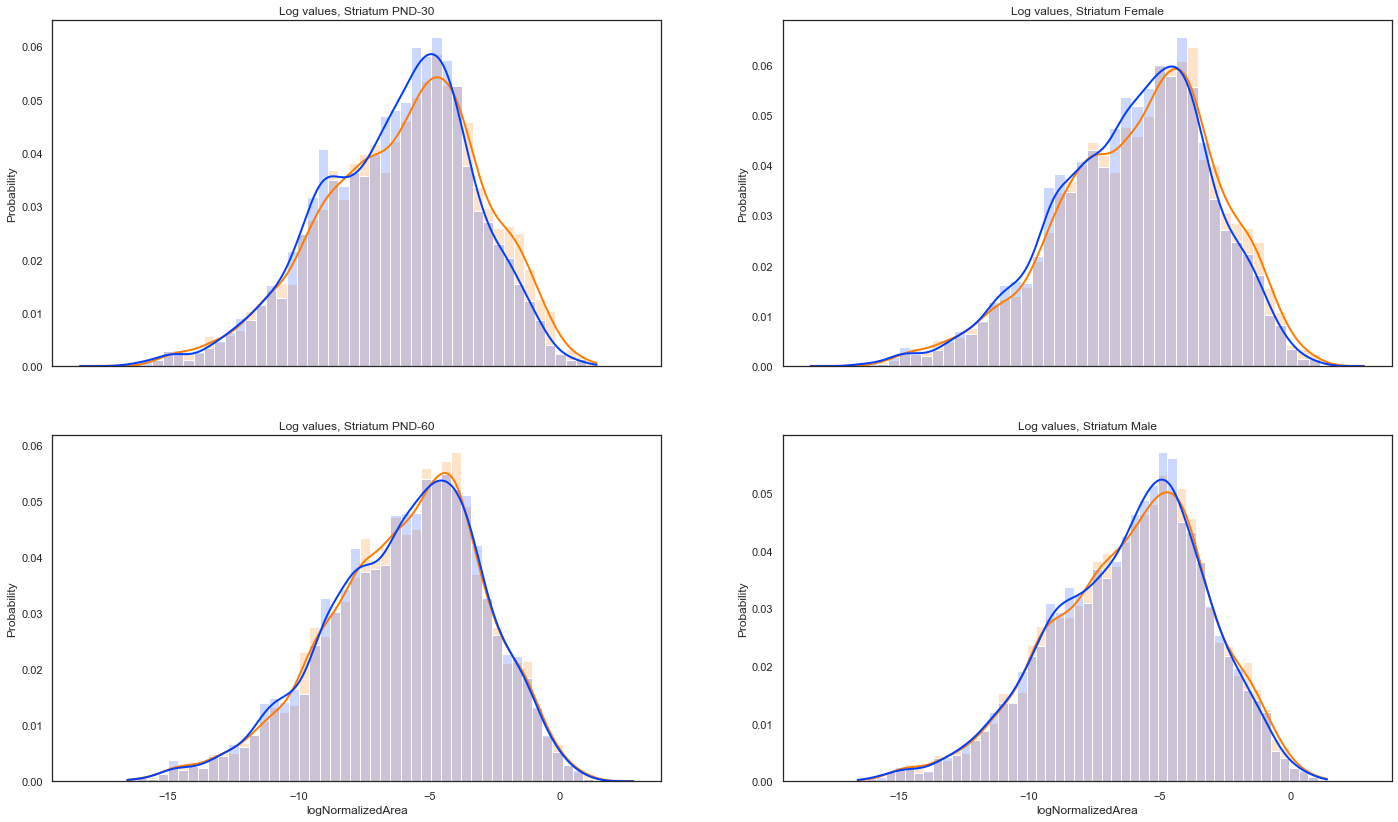

In [ ]:
sns.set_style('white')

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(24,14))

opt = {'bins': 50, 'alpha': 0.2, 'palette': 'bright',
        'stat': 'probability', 'kde': True,
        'line_kws': {'lw': 2}, 'common_norm': False}

sns.histplot(data=data[(data['TissueType'] == 'striatum') & (data['PND'] == 30)], x='logNormalizedArea', hue='Treatment', ax=ax[0,0], legend=False, **opt)
ax[0,0].set_title('Log values, Striatum PND-30')
sns.histplot(data=data[(data['TissueType'] == 'striatum') & (data['PND'] == 60)], x='logNormalizedArea', hue='Treatment', ax=ax[1,0], legend=False, **opt)
ax[1,0].set_title('Log values, Striatum PND-60')

sns.histplot(data=data[(data['TissueType'] == 'striatum') & (data['Sex'] == 'F')], x='logNormalizedArea', hue='Treatment', ax=ax[0,1], legend=False, **opt)
ax[0,1].set_title('Log values, Striatum Female')
sns.histplot(data=data[(data['TissueType'] == 'striatum') & (data['Sex'] == 'M')], x='logNormalizedArea', hue='Treatment', ax=ax[1,1], legend=False, **opt)
ax[1,1].set_title('Log values, Striatum Male')

fig.savefig(os.path.join(data_path,"distribution-Striatum-2cases.svg"), format='svg', facecolor='w')

plt.show()

# Statistics

## Wilcoxon test applied on the data with no normalization

#### Data divided by tissue

In [ ]:
tissue = ['striatum','cortex']
sex = ['F', 'M']
pnd = [30,60]
var_name = 'logNormalizedArea'


for t in tissue:
    a = data[(data['Treatment'] == 'control') & (data['TissueType']==t)][var_name]
    b = data[(data['Treatment'] == 'deltamethrin') & (data['TissueType']==t)][var_name]

    a = a.dropna()
    b = b.dropna()

    print(f'Tissue: {t}. P-value: {ranksums(a,b).pvalue:.2e}')

Tissue: striatum. P-value: 7.16e-06
Tissue: cortex. P-value: 6.80e-01


#### Data divided by gender

In [ ]:
for g in sex:
    a = data[(data['Treatment'] == 'control') & (data['Sex']==g)][var_name]
    b = data[(data['Treatment'] == 'deltamethrin') & (data['Sex']==g)][var_name]

    a = a.dropna()
    b = b.dropna()

    print(f'Gender: {g}. P-value: {ranksums(a,b).pvalue:.2e}')

Gender: F. P-value: 3.03e-10
Gender: M. P-value: 4.37e-01


#### Data divided by PND

In [ ]:
for p in pnd:
    a = data[(data['Treatment'] == 'control') & (data['PND']==p)][var_name]
    b = data[(data['Treatment'] == 'deltamethrin') & (data['PND']==p)][var_name]

    a = a.dropna()
    b = b.dropna()

    print(f'PND: {p}. P-value: {ranksums(a,b).pvalue:.2e}')

PND: 30. P-value: 7.49e-07
PND: 60. P-value: 6.26e-01


## T-test applied on the data with log normalization

#### Data divided by tissue

In [ ]:
var_name = 'logNormalizedArea'

for t in tissue:
    a = data[(data['Treatment'] == 'control') & (data['TissueType']==t)][var_name]
    b = data[(data['Treatment'] == 'deltamethrin') & (data['TissueType']==t)][var_name]

    a = a.dropna()
    b = b.dropna()

    print(f'Tissue: {t}. P-value: {ttest_ind(a,b).pvalue:.2e}')

Tissue: striatum. P-value: 2.19e-05
Tissue: cortex. P-value: 9.61e-01


#### Data divided by gender

In [ ]:
for g in sex:
    a = data[(data['Treatment'] == 'control') & (data['Sex']==g)][var_name]
    b = data[(data['Treatment'] == 'deltamethrin') & (data['Sex']==g)][var_name]

    a = a.dropna()
    b = b.dropna()

    print(f'Gender: {g}. P-value: {ttest_ind(a,b).pvalue:.2e}')

Gender: F. P-value: 9.09e-09
Gender: M. P-value: 3.87e-01


#### Data divided by PND

In [ ]:
for p in pnd:
    a = data[(data['Treatment'] == 'control') & (data['PND']==p)][var_name]
    b = data[(data['Treatment'] == 'deltamethrin') & (data['PND']==p)][var_name]

    a = a.dropna()
    b = b.dropna()

    print(f'PND: {p}. P-value: {ranksums(a,b).pvalue:.2e}')

PND: 30. P-value: 7.49e-07
PND: 60. P-value: 6.26e-01


## Three-way ANOVA on log normalized data

#### Quelli singoli sono mediati su tutto il resto. Mentre l'effetto del secondo oridne dice che è vero che partono da livelli differenti diversi striato e corteccia, ma l'effetto del trattamento ha effetto anche se loro sono già diversi

In [ ]:
model = ols('logNormalizedArea ~ C(Sex) + C(Treatment) + C(TissueType) + C(dateId) + C(Sex):C(Treatment) + C(TissueType):C(Treatment) + C(dateId):C(Treatment)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),243.146549,1.0,27.061704,1.979564e-07
C(Treatment),108.907104,1.0,12.121134,4.990256e-04
C(TissueType),7.883555,1.0,0.877423,3.489136e-01
C(dateId),593.667687,1.0,66.073976,4.456916e-16
C(Sex):C(Treatment),191.546341,1.0,21.318708,3.900300e-06
C(TissueType):C(Treatment),43.918847,1.0,4.888076,2.704800e-02
C(dateId):C(Treatment),0.101404,1.0,0.011286,9.153955e-01
Residual,390178.017337,43426.0,NaN,NaN


In [ ]:
model = ols('logNormalizedArea ~ C(Sex) + C(PND) + C(Treatment) + C(TissueType) + C(PND):C(Treatment) + C(Sex):C(Treatment) + C(TissueType):C(Treatment)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),246.433805,1.0,27.418838,1.645891e-07
C(PND),400.002653,1.0,44.505290,2.567082e-11
C(Treatment),106.066718,1.0,11.801247,5.924639e-04
C(TissueType),281.469188,1.0,31.316962,2.204753e-08
C(PND):C(Treatment),69.523524,1.0,7.735360,5.417309e-03
C(Sex):C(Treatment),192.065125,1.0,21.369643,3.798089e-06
C(TissueType):C(Treatment),53.017377,1.0,5.898845,1.515485e-02
Residual,390302.260253,43426.0,NaN,NaN


### Anova only striatum

In [ ]:
data_striatum = data[data['TissueType'] == 'striatum'].copy(deep=True)

In [ ]:
model = ols('logNormalizedArea ~ C(Sex) + C(Treatment)  + C(Sex):C(Treatment)', data=data_striatum).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),341.471062,1.0,37.931115,7.425594e-10
C(Treatment),161.801354,1.0,17.973136,2.247425e-05
C(Sex):C(Treatment),52.689075,1.0,5.852781,1.555861e-02
Residual,259179.091283,28790.0,NaN,NaN


In [ ]:
model = ols('logNormalizedArea ~ C(Sex) + C(PND) + C(Treatment)+ C(PND):C(Treatment) + C(Sex):C(Treatment)', data=data_striatum).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),341.121116,1.0,37.957367,7.326484e-10
C(PND),364.546328,1.0,40.563946,1.931560e-10
C(Treatment),159.335238,1.0,17.729615,2.554043e-05
C(PND):C(Treatment),98.107395,1.0,10.916646,9.542030e-04
C(Sex):C(Treatment),53.254207,1.0,5.925724,1.492745e-02
Residual,258716.437561,28788.0,NaN,NaN


# Heatmap

Index(['Lipid Class', 'Sample Name', 'Treatment', 'Sample Number',
       'Tissue weight (mg)', 'PND', 'Retention Time (min)',
       'Peak Area of Lipid Species', 'Peak Area of Internal Standard',
       'Normalized Peak Area (Peak Area of Lipid Species / (Peak Area of Internal Standard * Tissue Weight))',
       'logNormalizedArea', 'dateId'],
      dtype='object')


ValueError: The condensed distance matrix must contain only finite values.

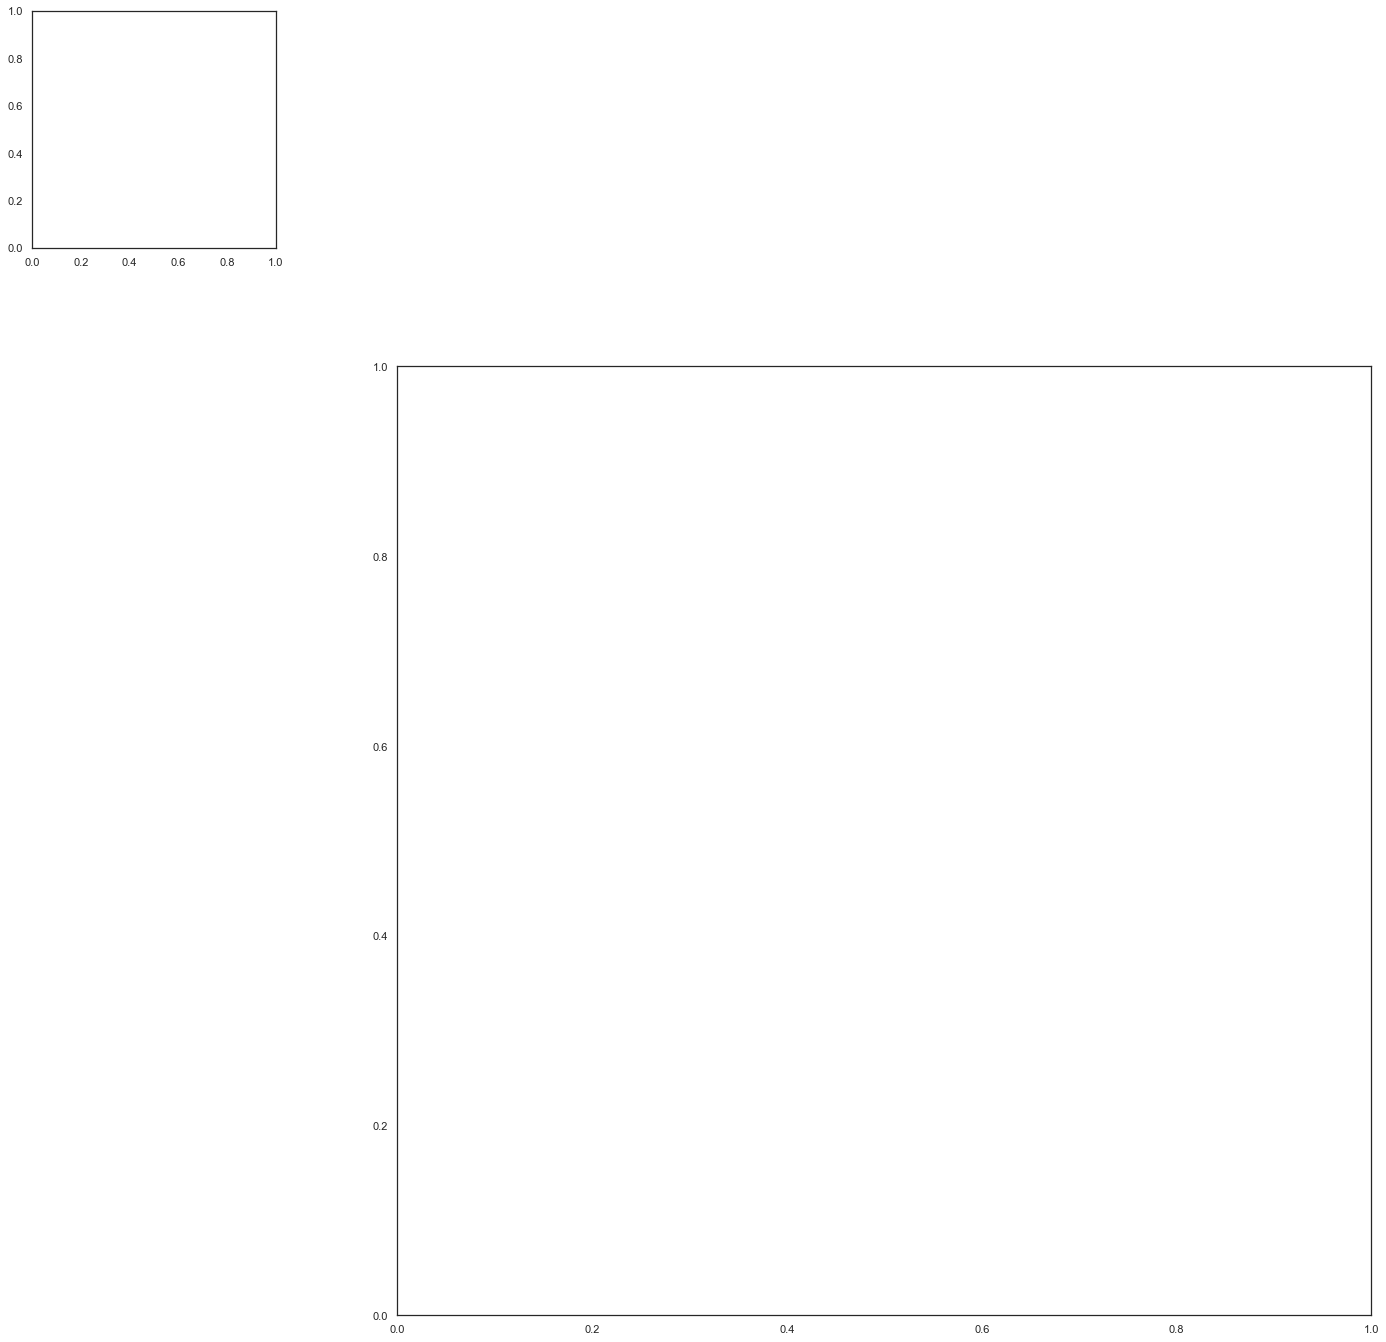

In [ ]:
# componentGroupName is Lipid Class?

data_grouped = data_striatum.groupby(by=['Lipid Class','Sample Name']).median().reset_index()
data_grouped.insert(2,'Treatment',['Control' if x[0] == 'control' else 'Deltamethrin' for x in data_grouped.iloc[:,1]])
data_grouped.sort_values(by='Sample Name',inplace=True)
print(data_grouped.columns)
pivot_kws=[
        'Sample Name',
        'Lipid Class',
        'logNormalizedArea'
]
data_pivot = data_grouped.pivot(*pivot_kws).sort_index()

lut = dict(zip(np.unique([x[0] for x in data_pivot.index]),'rg'))
treatment = pd.Series([x[0] for x in data_pivot.index])
#col_colors = treatment.map(lut)
ax = sns.clustermap(data=data_pivot,
        row_cluster=False,
        # row_colors=col_colors,
        figsize=(24,24),cmap='vlag')

ax.figure.savefig(os.path.join(data_path,"test.svg"),format="svg",facecolor="w")

plt.show()



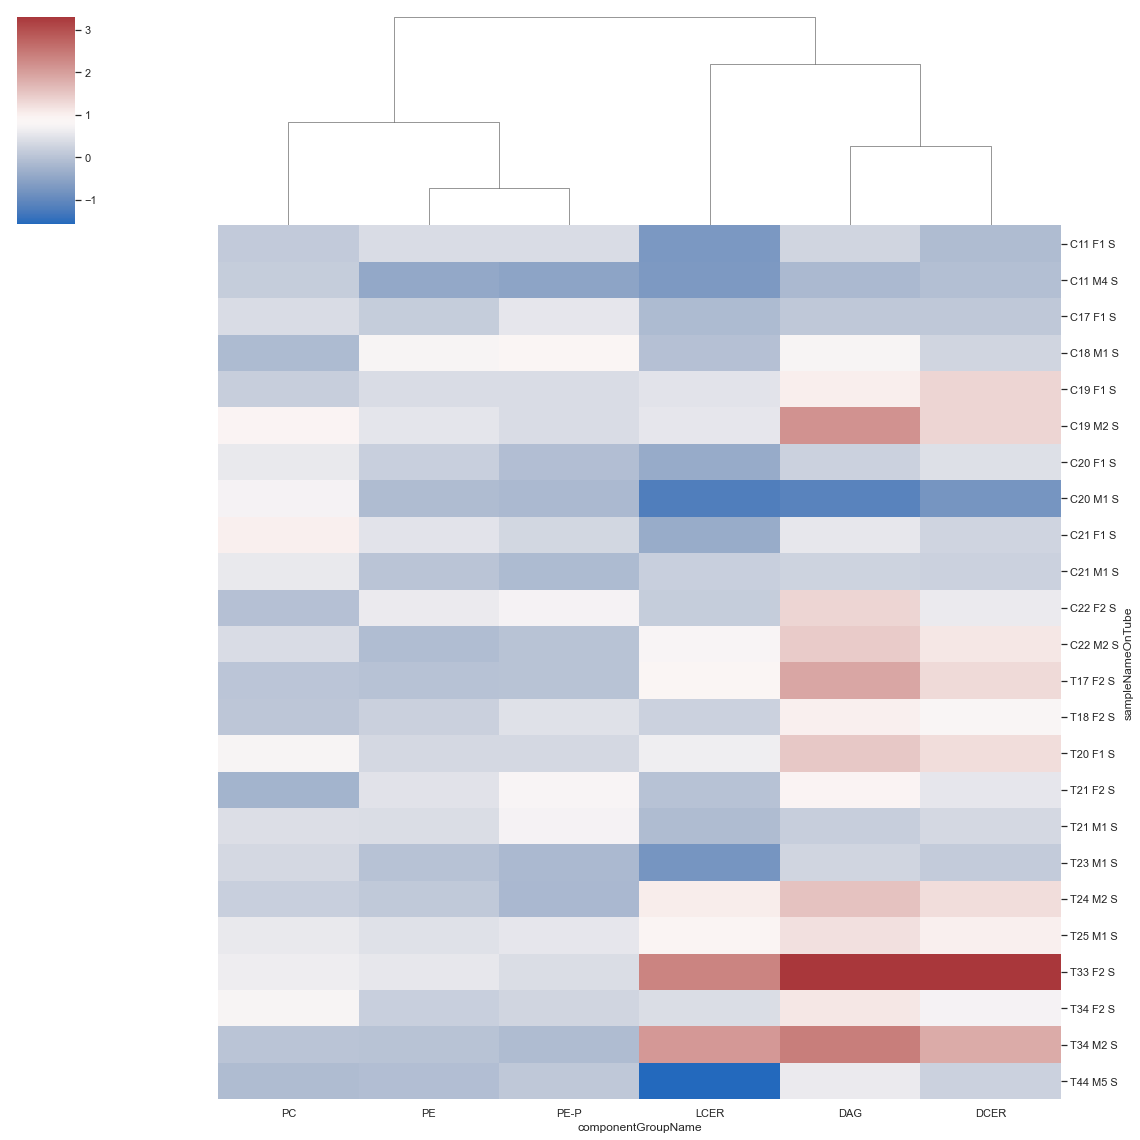

In [ ]:
cgn_selected = ['PC','PE','PE-P','DAG','DCER','LCER',
    # 'TAG','LPE','CE','SM','PE-O','PI','PS'
    ]
data_pivot_selected = data_pivot[cgn_selected]
sns.clustermap(data=data_pivot_selected,
        row_cluster=False,
        figsize=(16,16),cmap='vlag')
plt.show()

# Single lipids statistics

## Define lipids list

In [ ]:
lipids_list = data['Individual Lipid Species'].unique()
print(lipids_list.shape[0])

860


## Test lipid

In [ ]:
data_lipid = data[data['Individual Lipid Species'] == lipids_list[0]]

from scipy.stats import ttest_ind
multcomp = mc.MultiComparison(data_lipid['logNormalizedArea'], groups=data_lipid['Treatment'])
res = multcomp.allpairtest(ttest_ind)[1][2][0]
print(res)
res = multcomp.allpairtest(ttest_ind)[0]
print(res)

0.03291755956471241
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.05, alphacBonf=0.050
 group1    group2     stat   pval  pval_corr reject
---------------------------------------------------
control deltamethrin 2.1762 0.0329    0.0329   True
---------------------------------------------------


## Analysis control vs treatment

In [ ]:
import itertools
factor = 'Treatment'
results_all = []
for l in lipids_list:
    data_lipid = data[data['Individual Lipid Species'] == l]
    if data_lipid[factor].unique().size > 1: # Some lipids are not found in both classes
        for c in itertools.combinations(data_lipid[factor].unique(),2):
            a = data_lipid[data_lipid[factor] == c[0]]['logNormalizedArea'].values
            b = data_lipid[data_lipid[factor] == c[1]]['logNormalizedArea'].values
            pvalue = ttest_ind(a,b)[1]
            fc = np.mean(a)/np.mean(b)
            cd = np.abs((np.mean(a) - np.mean(b)))
            cd /= np.sqrt(
                ((a.size - 1)*np.var(a) + (b.size - 1)*np.var(b)) / (a.size + b.size - 2)
            )
            n_samples = a.size
            sp = TTestIndPower().power(effect_size=cd, nobs1=n_samples, alpha=0.05)
            results_all.append([l, fc, pvalue, c[0], c[1], cd, n_samples, sp])

colnames = ['lipid', 'fc', 'p', factor+'1', factor+'2', 'effectSize', 'sampleSize', 'statisticalPower']
results_all = pd.DataFrame(data=results_all, columns= colnames)
results_all.head()

/home/ivan/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ivan/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_10433/788473265.py:14: RuntimeWarning: invalid value encountered in double_scalars
  ((a.size - 1)*np.var(a) + (b.size - 1)*np.var(b)) / (a.size + b.size - 2)


,lipid,fc,p,Treatment1,Treatment2,effectSize,sampleSize,statisticalPower
0,SM(14:0)+H,0.979101,0.032918,control,deltamethrin,0.520210,36,0.585817
1,SM(16:0)+H,0.981280,0.162395,control,deltamethrin,0.337520,36,0.292354
2,SM(18:0)+H,0.973330,0.367727,control,deltamethrin,0.216720,36,0.148227
3,SM(18:1)+H,0.973903,0.152439,control,deltamethrin,0.345832,36,0.304364
4,SM(20:0)+H,0.986115,0.574527,control,deltamethrin,0.134832,36,0.087196


### Statistical power with average effectSize

In [ ]:
es_mean = np.median(results_all['effectSize'][results_all['p']<0.05])
# es_mean = 0.8
print(es_mean)
n_mice = 24
statisticalPower = TTestIndPower().power(effect_size=es_mean, nobs1=n_mice, alpha=0.05)
print(statisticalPower)

0.7501306084530086
0.7203904735086241


### Given an effect size, and a statistical power, determine n_mice

In [ ]:
es_mean = 0.7
alpha = 0.05
statisticalPower = 0.8
n_mice_ideal = TTestIndPower().solve_power(effect_size=es_mean, alpha=alpha, power=statisticalPower)
print(n_mice_ideal)

33.024569515862694


## Plots

In [ ]:
def adjustlabels(fig, labels, max_iter=1000, eps=0.01, delta=0.1, 
                 clip_to_axes=True, pad=0.1):
    N = len(labels)
    widths = np.zeros(N)
    heights = np.zeros(N)
    centers = np.zeros((N, 2))
    for i,l in enumerate(labels):
        bb = l.get_window_extent(renderer=fig.canvas.get_renderer())
        bb = bb.transformed(plt.gca().transData.inverted())
        widths[i] = bb.width
        heights[i] = bb.height
        centers[i] = (bb.min + bb.max)/2
        
    ylim = plt.gca().get_ylim()
    xlim = plt.gca().get_xlim()    

    def clip():
        for i in range(N):
            centers[i,0] = max(centers[i,0], xlim[0] + widths[i]/2 + pad)
            centers[i,0] = min(centers[i,0], xlim[1] - widths[i]/2 - pad)
            centers[i,1] = max(centers[i,1], ylim[0] + heights[i]/2 + pad)
            centers[i,1] = min(centers[i,1], ylim[1] - heights[i]/2 - pad)
            labels[i].set_position(centers[i])
    clip()

    for i in range(max_iter):
        stop = True
        for a in range(N):
            for b in range(N):
                if ((a!=b) and
                    (np.abs(centers[a,0]-centers[b,0]) < (widths[a]+widths[b])/2 + delta) and
                    (np.abs(centers[a,1]-centers[b,1]) < (heights[a]+heights[b])/2 +  delta)):
                    
                    d = centers[a] - centers[b]
                    centers[a] += d * eps
                    centers[b] -= d * eps
                    labels[a].set_position(centers[a])
                    labels[b].set_position(centers[b])
                    if clip_to_axes:
                        clip()
                    stop = False
        if stop:
            break 

In [ ]:
def plot_volcano(results_all, fc_threshold=0.3, pvalue_threshold=1.5):
    
    col = np.where(np.log2(results_all['fc']) < -fc_threshold,'r',np.where(np.log2(results_all['fc']) > fc_threshold,'g','k'))

    fig = plt.figure(figsize=(14,12))
    plt.scatter(np.log2(results_all['fc']), -np.log10(results_all['p']), c=col)
    shownlabels = []
    l_ha = ['right','left']

    for i in range(results_all.shape[0]): 

        x = np.log2(results_all.iloc[i]['fc'])
        y = -np.log10(results_all.iloc[i]['p'])
        aa = np.random.rand()*3 - 1.5 + 0.5 * np.sign(x)
        ii = np.sign(aa) * 0.5 + 0.5
        if (np.abs(x) > fc_threshold) and (y > pvalue_threshold):
            l = plt.text(x+0.1*aa, y, 
                         results_all.iloc[i]['lipid'],ha=l_ha[int(ii)], va='center', color='k', 
                         fontsize=10, zorder=10,bbox=dict(facecolor='w', edgecolor='#777777', boxstyle='round', linewidth=.5, pad=.2))
            shownlabels.append(l)

    #adjustlabels(fig, shownlabels)

    plt.xlabel('log FC',)
    plt.ylabel('-log10 (Pvalue)')
    plt.rc('axes', labelsize=18) 

    plt.show()

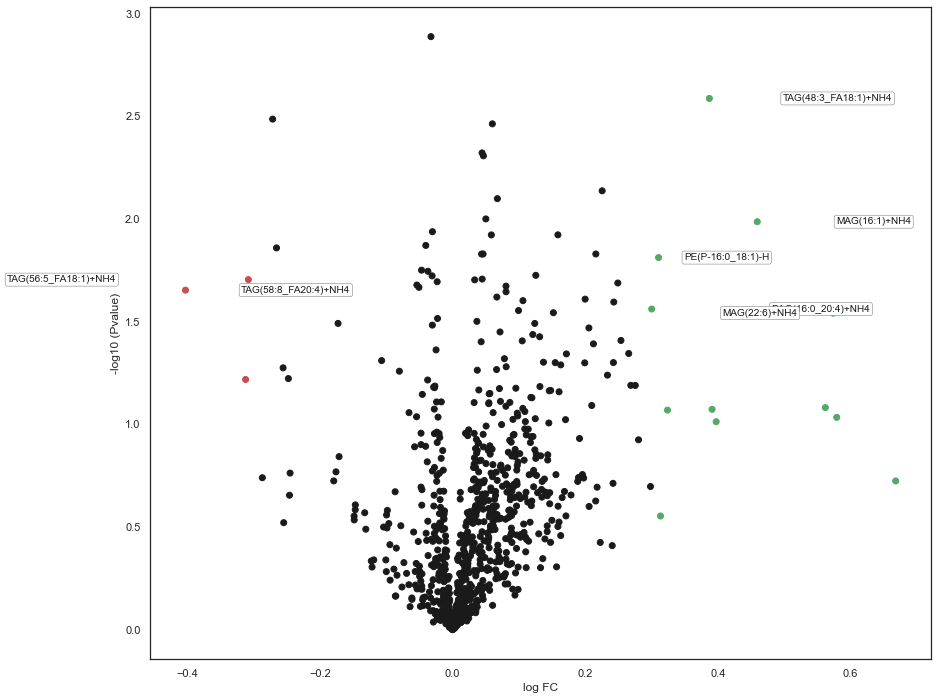

In [ ]:
plot_volcano(results_all,fc_threshold=0.3, pvalue_threshold=1.5)

## Analysis striatum vs cortex

In [ ]:
factor = 'TissueType'
results_all = []
for l in lipids_list:
    data_lipid = data[data['Individual Lipid Species'] == l]
    if data_lipid[factor].unique().size > 1: # Some lipids are not found in both classes
        for c in itertools.combinations(data_lipid[factor].unique(),2):
            a = data_lipid[data_lipid[factor] == c[0]]['logNormalizedArea'].values
            b = data_lipid[data_lipid[factor] == c[1]]['logNormalizedArea'].values
            pvalue = ttest_ind(a,b)[1]
            fc = np.mean(a)/np.mean(b)
            results_all.append([l, fc, pvalue, c[0], c[1]])

colnames = ['lipid', 'fc', 'p', factor+'1', factor+'2']
results_all = pd.DataFrame(data=results_all, columns= colnames)
results_all.head()

results_all.to_csv('tissue_treatment.csv')

/home/ivan/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ivan/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


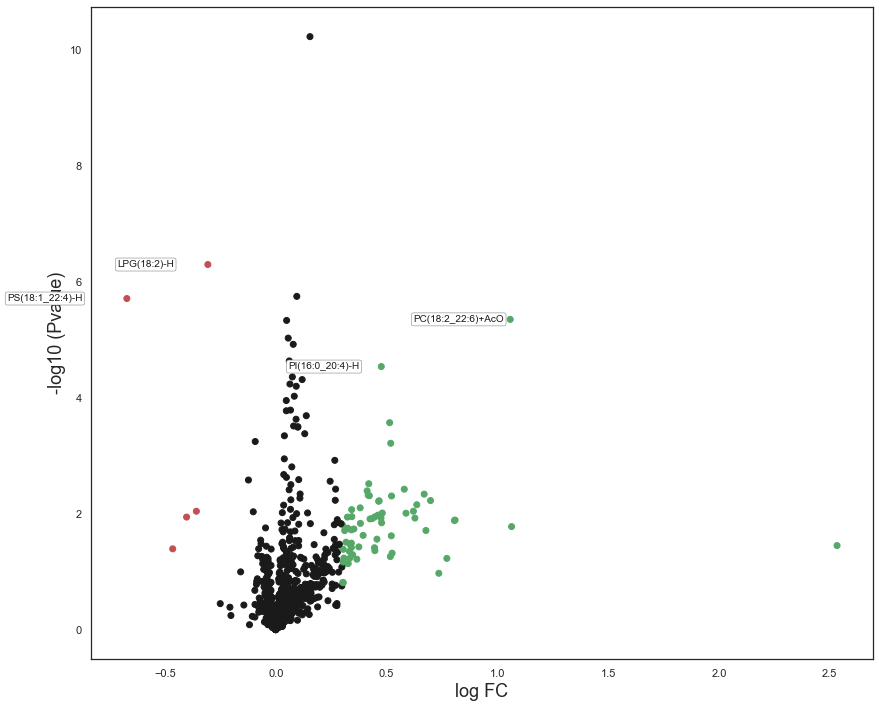

In [ ]:
plot_volcano(results_all,fc_threshold=0.3, pvalue_threshold=4)

## Analysis 30 vs 60

In [ ]:
factor = 'PND'
results_all = []
for l in lipids_list:
    data_lipid = data[data['Individual Lipid Species'] == l]
    if data_lipid[factor].unique().size > 1: # Some lipids are not found in both classes
        for c in itertools.combinations(data_lipid[factor].unique(),2):
            a = data_lipid[data_lipid[factor] == c[0]]['logNormalizedArea'].values
            b = data_lipid[data_lipid[factor] == c[1]]['logNormalizedArea'].values
            pvalue = ttest_ind(a,b)[1]
            fc = np.mean(a)/np.mean(b)
            results_all.append([l, fc, pvalue, c[0], c[1]])

colnames = ['lipid', 'fc', 'p', factor+'1', factor+'2']
results_all = pd.DataFrame(data=results_all, columns= colnames)
results_all.head()

results_all.to_csv('pnd_treatment.csv')

/home/ivan/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ivan/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


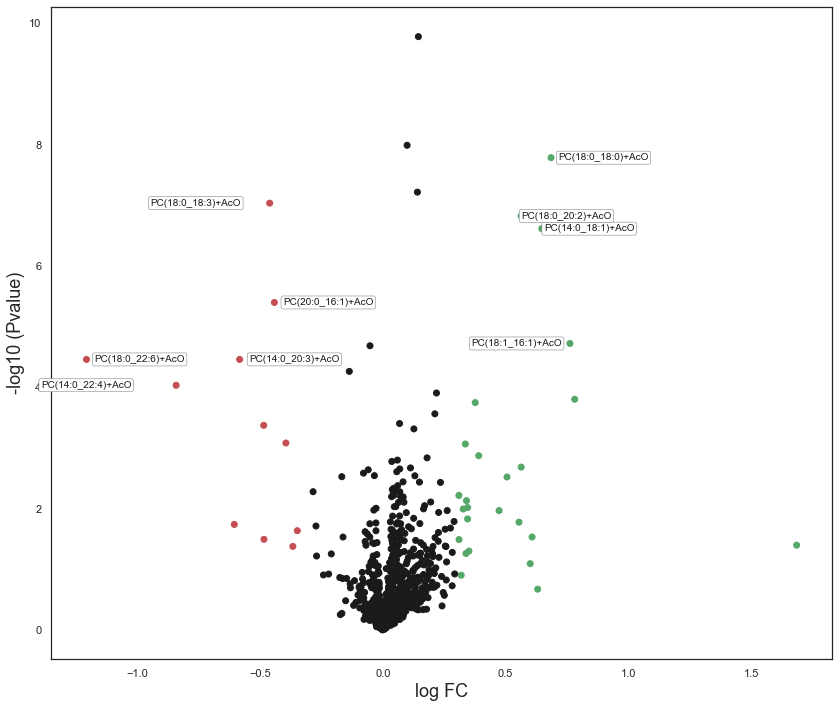

In [ ]:
plot_volcano(results_all,fc_threshold=0.3, pvalue_threshold=4)

## Analysis male vs female

In [ ]:
factor = 'Sex'
results_all = []
for l in lipids_list:
    data_lipid = data[data['Individual Lipid Species'] == l]
    if data_lipid[factor].unique().size > 1: # Some lipids are not found in both classes
        for c in itertools.combinations(data_lipid[factor].unique(),2):
            a = data_lipid[data_lipid[factor] == c[0]]['logNormalizedArea'].values
            b = data_lipid[data_lipid[factor] == c[1]]['logNormalizedArea'].values
            pvalue = ttest_ind(a,b)[1]
            fc = np.mean(a)/np.mean(b)
            results_all.append([l, fc, pvalue, c[0], c[1]])

colnames = ['lipid', 'fc', 'p', factor+'1', factor+'2']
results_all = pd.DataFrame(data=results_all, columns= colnames)
results_all.head()

results_all.to_csv('sex_treatment.csv')

/home/ivan/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ivan/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


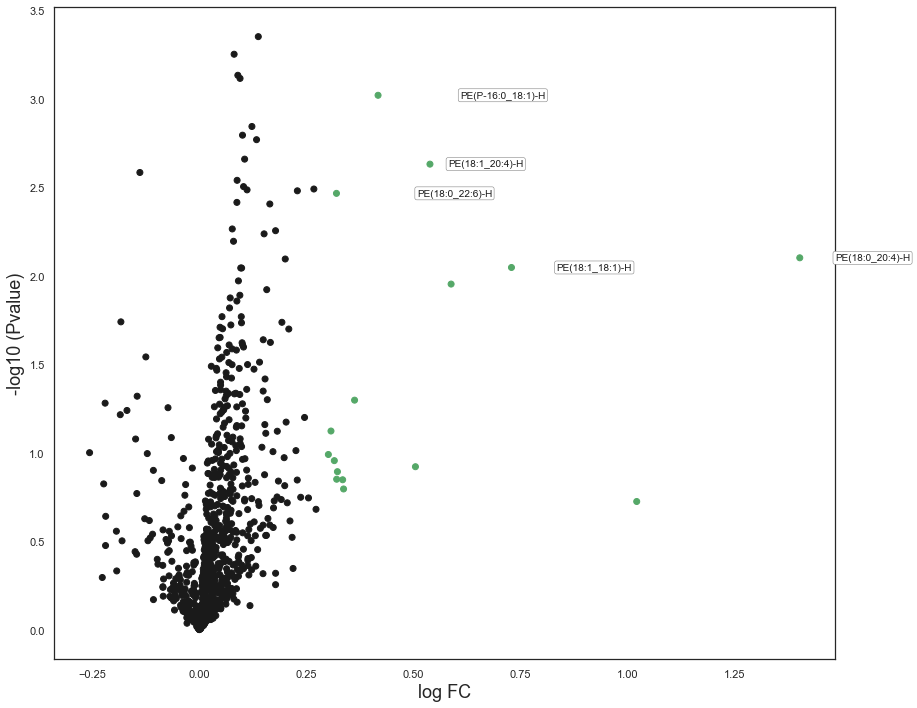

In [ ]:
plot_volcano(results_all,fc_threshold=0.3, pvalue_threshold=2)